In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
def centr(G):
  N = G.number_of_nodes()
  length = dict(nx.all_pairs_shortest_path_length(G))
  degree_centrality = list(sorted(nx.degree_centrality(G).items(), key=lambda x: x[1],  reverse=True))
  closeness_centrality = sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1],  reverse=True)
  eigenvector_centrality = sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1],  reverse=True)
  betweenness_centrality = sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1],  reverse=True)
  decay_centrality1 = np.zeros((N, 2))
  pagerank = np.zeros(N)
  hub = np.zeros(N)
  autorities = np.zeros(N)
  h, a = nx.hits(G)
  pagerank = sorted(nx.pagerank_numpy(G).items(), key=lambda x: x[1],  reverse=True)
  hub = sorted(h.items(), key=lambda x: x[1],  reverse=True)
  autorities = sorted(a.items(), key=lambda x: x[1],  reverse=True)
  return [degree_centrality[0][0],closeness_centrality[0][0],
          betweenness_centrality[0][0],eigenvector_centrality[0][0],
          pagerank[0][0],hub[0][0],autorities[0][0]]

In [2]:
def centr1(G):
  N = G.number_of_nodes()
  length = dict(nx.all_pairs_shortest_path_length(G))
  degree_centrality = list(sorted(nx.degree_centrality(G).items(), key=lambda x: x[1]))
  closeness_centrality = sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1])
  eigenvector_centrality = sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1])
  betweenness_centrality = sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1])
  decay_centrality1 = np.zeros((N, 2))
  pagerank = np.zeros(N)
  hub = np.zeros(N)
  autorities = np.zeros(N)
  h, a = nx.hits(G)
  pagerank = sorted(nx.pagerank_numpy(G).items(), key=lambda x: x[1])
  hub = sorted(h.items(), key=lambda x: x[1])
  autorities = sorted(a.items(), key=lambda x: x[1])
  return [degree_centrality[0][0],closeness_centrality[0][0],
          betweenness_centrality[0][0],eigenvector_centrality[0][0],
          pagerank[0][0],hub[0][0],autorities[0][0]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  del sys.path[0]


Случайное число
Всего людей в популяуии =  159 lenY =  12
Количество переболевших =  131    Время до исчезновения болезни =  11
Максимальное число зараженных в момент времени =  32

degree_centrality
Всего людей в популяуии =  159 lenY =  8
Количество переболевших =  135    Время до исчезновения болезни =  7
Максимальное число зараженных в момент времени =  42

closeness_centrality
Всего людей в популяуии =  159 lenY =  8
Количество переболевших =  136    Время до исчезновения болезни =  7
Максимальное число зараженных в момент времени =  52

betweenness_centrality
Всего людей в популяуии =  159 lenY =  9
Количество переболевших =  126    Время до исчезновения болезни =  8
Максимальное число зараженных в момент времени =  31

eigenvector_centrality
Всего людей в популяуии =  159 lenY =  9
Количество переболевших =  134    Время до исчезновения болезни =  8
Максимальное число зараженных в момент времени =  35

pagerank
Всего людей в популяуии =  159 lenY =  8
Количество переболевших =  

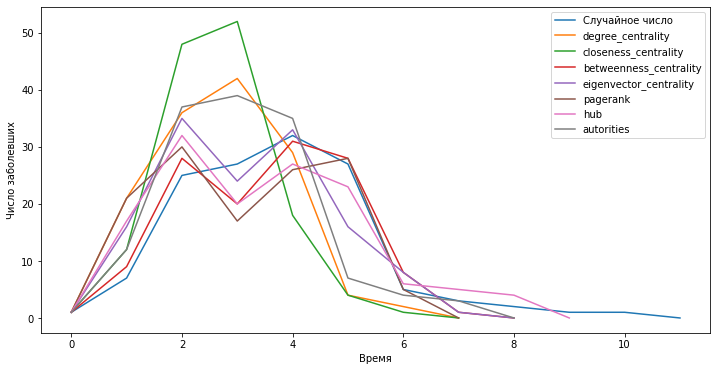

In [7]:
# Задание 1.1
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import community
import math

Q = nx.read_edgelist("/content/drive/MyDrive/Граф.txt", nodetype=int, create_using=nx.Graph)
P = max(nx.connected_components(Q), key=len)
G = Q.subgraph(P).copy()
N = G.number_of_nodes()
beta = 0.4 #вероятность заражения
nu = 1 # вероятность выздоровить
# Сначала все неинфецированные
nx.set_node_attributes(G, "S", "sos")
label=["Случайное число", "degree_centrality",'closeness_centrality',
          'betweenness_centrality','eigenvector_centrality',
       'pagerank','hub','autorities']
# первое заражение
central = centr(G)
node=G.nodes()
k=[]
k.append(random.choice(list(node)))
# 356832441
# k.append(356832441)
k= k+central
# print(sorted([[node, val] for (node, val) in G.degree()],reverse=True, key=lambda x: x[1])[0])
def epidemia(G,k):
  G0 = G.copy(G)
  node=G0.nodes()
  node[k]["sos"] = "I"
  t = 1
  Y=[1]
  while len([node[i]["sos"] for i in node if node[i]["sos"]=="R" or node[i]["sos"]=="S"]) < N:
    r = [i for i in node if node[i]["sos"]=="I"]
    for i in r:
      node[i]["sos"] = "R"
    neighbors = []
    neighbors=np.array(neighbors)
    for i in r:
      neighbors = np.append(neighbors,list(G0.neighbors(i)))
    for i in neighbors:
      if node[i]["sos"] == "S":
        p=random.random()
        if p<beta:
          node[i]["sos"] = "I"
    Y.append(len([node[i]["sos"] for i in node if node[i]["sos"]=="I"]))
    t+=1
  return Y, node, t-1
j=0
Y=[]
j=0
for i in k:
  M, node1,t = epidemia(G,i)
  Y.append(M)
  perebolevshie = len([node1[i]["sos"] for i in node1 if node1[i]["sos"]=="R"])
  print(label[j])
  print("Всего людей в популяуии = ", N, "lenY = ", len(M))
  print("Количество переболевших = ", perebolevshie, "   Время до исчезновения болезни = " , t)
  print("Максимальное число зараженных в момент времени = ", np.max(M))
  print()
  j+=1

fig, ax= plt.subplots()  
fig.set_figwidth(12)
fig.set_figheight(6)
for i in range(len(k)):
  X = np.arange(len(Y[i]))
  ax.plot(X,Y[i], label=label[i])
ax.set_xlabel("Время")                             
ax.set_ylabel("Число заболевших")    
plt.legend()                     
plt.show() 




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  del sys.path[0]


k= [138712454, 29701025, 31571847, 63729149, 31571847, 164310661, 31571847, 31571847]
Случайное число
Всего людей в популяуии =  159 lenY =  10
Количество переболевших =  135    Время до исчезновения болезни =  9
Максимальное число зараженных в момент времени =  57

degree_centrality
Всего людей в популяуии =  159 lenY =  9
Количество переболевших =  133    Время до исчезновения болезни =  8
Максимальное число зараженных в момент времени =  38

closeness_centrality
Всего людей в популяуии =  159 lenY =  2
Количество переболевших =  1    Время до исчезновения болезни =  1
Максимальное число зараженных в момент времени =  1

betweenness_centrality
Всего людей в популяуии =  159 lenY =  2
Количество переболевших =  1    Время до исчезновения болезни =  1
Максимальное число зараженных в момент времени =  1

eigenvector_centrality
Всего людей в популяуии =  159 lenY =  3
Количество переболевших =  2    Время до исчезновения болезни =  2
Максимальное число зараженных в момент времени =  1

p

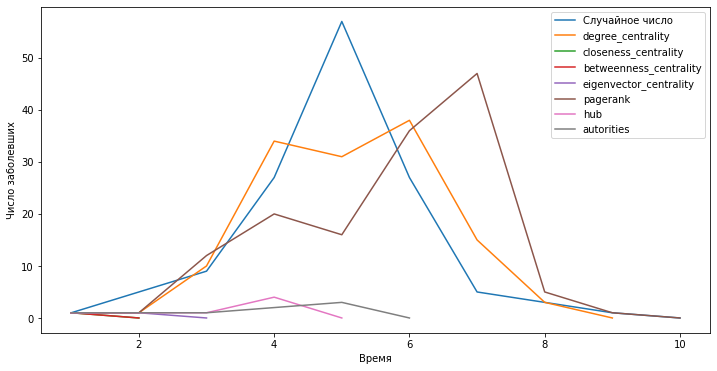

In [ ]:
Q = nx.read_edgelist("/content/drive/MyDrive/Граф.txt", nodetype=int, create_using=nx.Graph)
P = max(nx.connected_components(Q), key=len)
G = Q.subgraph(P).copy()
N = G.number_of_nodes()
beta = 0.4 #вероятность заражения
nu = 1 # вероятность выздоровить
# Сначала все неинфецированные
nx.set_node_attributes(G, "S", "sos")
label=["Случайное число", "degree_centrality",'closeness_centrality',
          'betweenness_centrality','eigenvector_centrality',
       'pagerank','hub','autorities']
# первое заражение
central = centr1(G)
node=G.nodes()
k=[]
k.append(random.choice(list(node)))
# 356832441
# k.append(356832441)
k= k+central
print("k=",k)
# print(sorted([[node, val] for (node, val) in G.degree()],reverse=True, key=lambda x: x[1])[0])
def epidemia(G,k):
  G0 = G.copy(G)
  node=G0.nodes()
  node[k]["sos"] = "I"
  t = 1
  Y=[1]
  while len([node[i]["sos"] for i in node if node[i]["sos"]=="R" or node[i]["sos"]=="S"]) < N:
    r = [i for i in node if node[i]["sos"]=="I"]
    for i in r:
      node[i]["sos"] = "R"
    neighbors = []
    neighbors=np.array(neighbors)
    for i in r:
      neighbors = np.append(neighbors,list(G0.neighbors(i)))
    for i in neighbors:
      if node[i]["sos"] == "S":
        p=random.random()
        if p<beta:
          node[i]["sos"] = "I"
    Y.append(len([node[i]["sos"] for i in node if node[i]["sos"]=="I"]))
    t+=1
  return Y, node, t-1
j=0
Y=[]
for i in k:
  M, node1,t = epidemia(G,i)
  Y.append(M)
  perebolevshie = len([node1[i]["sos"] for i in node1 if node1[i]["sos"]=="R"])
  print(label[j])
  print("Всего людей в популяуии = ", N, "lenY = ", len(M))
  print("Количество переболевших = ", perebolevshie, "   Время до исчезновения болезни = " ,t)
  print("Максимальное число зараженных в момент времени = ", np.max(M))
  print()
  j+=1

fig, ax= plt.subplots()  
fig.set_figwidth(12)
fig.set_figheight(6)
for i in range(len(k)):
  X = np.arange(1, len(Y[i])+1)
  ax.plot(X,Y[i], label=label[i])
ax.set_xlabel("Время")                             
ax.set_ylabel("Число заболевших")    
plt.legend()                     
plt.show() 

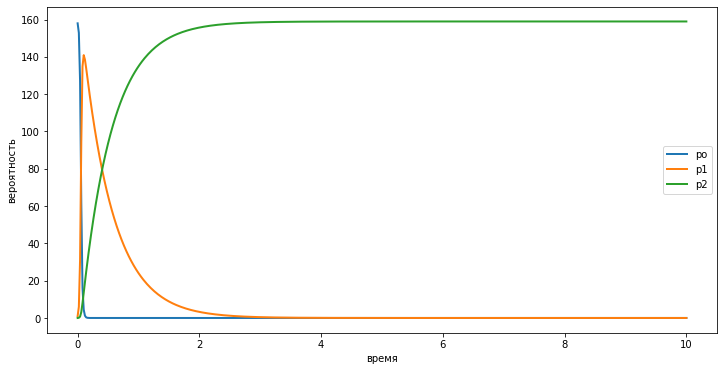

[3.94616422e-18 3.66303851e-07 1.59000000e+02] p0+p1+p2 = 158.99999999999994


In [ ]:
# # Распространение с помощью диф.ур дляя себя
# import random
# import networkx as nx
# import numpy as np
# import matplotlib.pyplot as plt
# from networkx.algorithms import community
# import math
# Q = nx.read_edgelist("/content/drive/MyDrive/Граф.txt", nodetype=int, create_using=nx.Graph)
# P = max(nx.connected_components(Q), key=len)
# G = Q.subgraph(P).copy()
# N = G.number_of_nodes()
# beta = 0.6 #вероятность заражения
# nu = 2 # вероятность выздоровить
# t_0 = 0
# T = 10
# n=500
# node=G.nodes()
# N=G.number_of_nodes()
# # массив начальных условий 
# p_0 = np.zeros(3)
# p_0[0]= N-1
# p_0[1]= 1
# p_0[2]= 0

# # вычисляет значение правой части прямой задачи в точке (t,y)
# def g(t, y):
#     P = np.zeros(3)
#     P[0] =-beta*y[0]*y[1]
#     P[1] =beta*y[0]*y[1]-nu*y[1]
#     P[2] =nu*y[1]
#     return P

# # метод Рунге-Кутты 4 порядка аппроксимации
# # func(t,y) - правая часть системы; y'(t0)=y0
# def rk4(func, t0, y0, t1, n):
#     h = (t1 - t0) / n
#     y = y0.copy()
#     r = np.zeros((n + 1, 3))
#     r[0] = y.copy()
#     for i in range(1, n + 1):
#         k1 = h * func(t0, y)
#         k2 = h * func(t0 + 0.5 * h, y + 0.5 * k1)
#         k3 = h * func(t0 + 0.5 * h, y + 0.5 * k2)
#         k4 = h * func(t0 + h, y + k3)
#         y = y + (1.0 / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
#         r[i] = y.copy()
#         t0 = t0 + h
#     return r

# grid = np.linspace(t_0,T, num=n + 1, endpoint=True)
# Y = rk4(g, t_0, p_0, T, n)

# fig, ax = plt.subplots()
# #  установлен по умолчанию):
# ax.plot(grid, Y[:,0],
#         label='po',
#         linewidth = 2)

# ax.plot(grid, Y[:,1],
#         label='p1',
#         #linestyle = '--',
#         linewidth = 2)

# ax.plot(grid, Y[:,2], label='p2',
#         linewidth = 2)

# fig.set_figwidth(12)
# fig.set_figheight(6)
# plt.xlabel('время')
# plt.ylabel('вероятность')
# plt.legend()
# plt.show()
# print(Y[n,:], "p0+p1+p2 =", Y[n,0]+Y[n,1]+Y[n,2])

Всего людей в популяуии =  159
Количество переболевших =  155.791    Время до исчезновения болезни =  11.696
Максимальное число зараженных в момент времени =  143


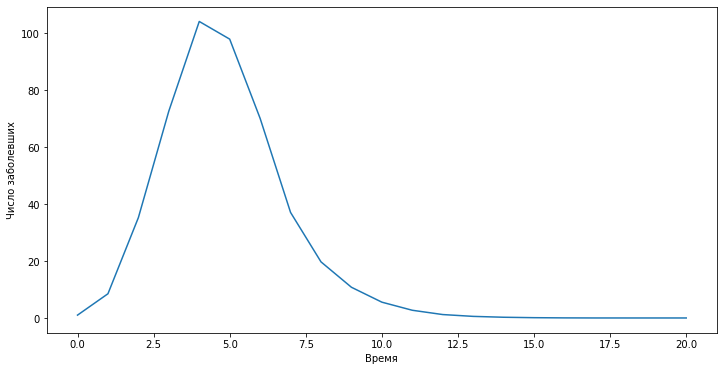

In [ ]:

# Задание 1.2
Q = nx.read_edgelist("/content/drive/MyDrive/Граф.txt", nodetype=int, create_using=nx.Graph)
P = max(nx.connected_components(Q), key=len)
G = Q.subgraph(P).copy()
N = G.number_of_nodes()
beta = 0.6 #вероятность заражения
step = 3
# Сначала все неинфецированные
nx.set_node_attributes(G, "S", "sos")
nx.set_node_attributes(G, 0, "tau")

def il(G,maxt):
  G0=G.copy()
  node=G0.nodes()
  # первое заражение
  r = random.choice(list(node))
  node[r]["sos"] = "I"
  t = 1
  Y=[1]
  while len([node[i]["sos"] for i in node if node[i]["sos"]=="R" or node[i]["sos"]=="S"]) < N:
    r = [i for i in node if node[i]["sos"]=="I"]
    for i in r:
      node[i]["tau"] +=1
      if node[i]["tau"]== step:
        node[i]["sos"] = "R"
    neighbors = []
    neighbors=np.array(neighbors)
    for i in r:
      neighbors = np.append(neighbors,list(G0.neighbors(i)))
    for i in neighbors:
      if node[i]["sos"] == "S":
        p=random.random()
        if p<beta:
          node[i]["sos"] = "I"
    Y.append(len([node[i]["sos"] for i in node if node[i]["sos"]=="I"]))
    perebolevshie = len([node[i]["sos"] for i in node if node[i]["sos"]=="R"])
    t+=1
  # while len(Y) != maxt:
  #   Y.append(0)
  return Y, perebolevshie, t-1
n=1000 #кольчество итераций
Y=[]
perebol=np.zeros(n)
time=np.zeros(n)
for i in range(n):
  U,perebol[i],time[i] = il(G,maxt)
  Y.append(U)

maxt=len(max(Y, key=len))
Y1=np.zeros(maxt)
for i in range(n):
  while len(Y[i]) != maxt:
    Y[i].append(0)

#среднее число
for j in range(maxt):
  Y1[j]=sum([Y[i][j] for i in range(n)])/n
perebolevshie = sum(perebol)/n
t = sum(time)/n

print("Всего людей в популяуии = ", N)
print("Количество переболевших = ", perebolevshie, "   Время до исчезновения болезни = " , t)
print("Максимальное число зараженных в момент времени = ", np.max(Y))

X = np.arange(maxt)
fig, ax= plt.subplots()  
fig.set_figwidth(12)
fig.set_figheight(6)
ax.plot(X,Y1)
ax.set_xlabel("Время")                             
ax.set_ylabel("Число заболевших")                         
plt.show()

k = 0.3
Шаг на котором все стало плохо =  3 Преболевших на этот момент =  1
Больных на этот момент =  65

Шаг на котором закончился локдаун =  8 Преболевших на этот момент =  129
Больных на этот момент =  20


Всего людей в популяуии =  159
Количество переболевших =  157    Время до исчезновения болезни =  14
Максимальное число зараженных в момент времени =  109

k = 0.6
Шаг на котором все стало плохо =  4 Преболевших на этот момент =  6
Больных на этот момент =  49

Шаг на котором закончился локдаун =  9 Преболевших на этот момент =  113
Больных на этот момент =  31


Всего людей в популяуии =  159
Количество переболевших =  150    Время до исчезновения болезни =  13
Максимальное число зараженных в момент времени =  91

k = 0.9
Шаг на котором все стало плохо =  2 Преболевших на этот момент =  0
Больных на этот момент =  45

Шаг на котором закончился локдаун =  7 Преболевших на этот момент =  52
Больных на этот момент =  1


Всего людей в популяуии =  159
Количество переболевших =  141

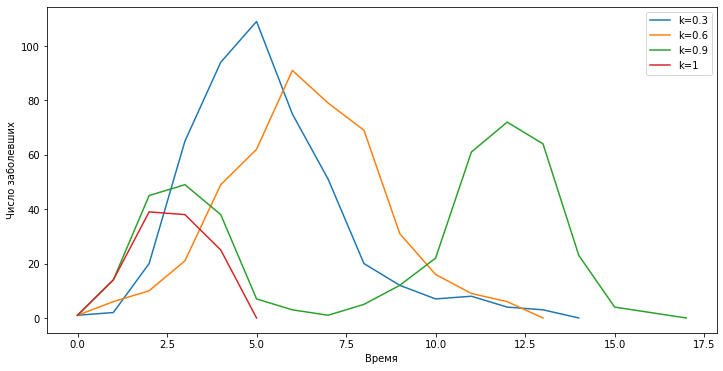

In [ ]:
# Задание 1.3 количество связей
Q = nx.read_edgelist("/content/drive/MyDrive/Граф.txt", nodetype=int, create_using=nx.Graph)
P = max(nx.connected_components(Q), key=len)
G = Q.subgraph(P).copy()
N = G.number_of_nodes()
beta = 0.6 #вероятность заражения
step = 3
# Сначала все неинфецированные
nx.set_node_attributes(G, "S", "sos")
nx.set_node_attributes(G, 0, "tau")
node=G.nodes()
# первое заражение
def locked(G,k):
  print("k = "+ str(k))
  G0=G.copy()
  node=G0.nodes()
  r = random.choice(list(node))
  node[r]["sos"] = "I"
  t = 1
  Y=[1]
  # Пока число больных не превышает трети ничего страшного
  while len([node[i]["sos"] for i in node if  node[i]["sos"]=="I"]) < N/5 and len([node[i]["sos"] for i in node if node[i]["sos"]=="R" or node[i]["sos"]=="S"]) < N:
    r = [i for i in node if node[i]["sos"]=="I"]
    for i in r:
      node[i]["tau"] +=1
      if node[i]["tau"]== step:
        node[i]["sos"] = "R"
    neighbors = []
    neighbors=np.array(neighbors)
    for i in r:
      neighbors = np.append(neighbors,list(G0.neighbors(i)))
    for i in neighbors:
      if node[i]["sos"] == "S":
        p=random.random()
        if p<beta:
          node[i]["sos"] = "I"
    Y.append(len([node[i]["sos"] for i in node if node[i]["sos"]=="I"]))
    t+=1

  print("Шаг на котором все стало плохо = ", t-1, "Преболевших на этот момент = ", len([node[i]["sos"] for i in node if node[i]["sos"]=="R"]))
  print("Больных на этот момент = ", len([node[i]["sos"] for i in node if node[i]["sos"]=="I"]) )
  # Далее уменьшаем число связей на k% процентов случайным образом
  E = G0.number_of_edges()
  edges=G0.edges()
  edges_remove=[]
  r=[]
  r.append(random.choice(list(edges)))
  for i in range(int(E*k)):
    while r not in G0.edges():
      r = random.choice(list(edges))
    q=[]
    q.append(r)
    G0.remove_edges_from(q)
    edges_remove.append(r)

  # Далее продолжаем распространение с сокращенными связями 
  t_1=0
  while len([node[i]["sos"] for i in node if node[i]["sos"]=="R" or node[i]["sos"]=="S"]) < N and t_1<5:
    r = [i for i in node if node[i]["sos"]=="I"]
    for i in r:
      node[i]["tau"] +=1
      if node[i]["tau"]== step:
        node[i]["sos"] = "R"
    neighbors = []
    neighbors=np.array(neighbors)
    for i in r:
      neighbors = np.append(neighbors,list(G0.neighbors(i)))
    for i in neighbors:
      if node[i]["sos"] == "S":
        p=random.random()
        if p<beta:
          node[i]["sos"] = "I"
    Y.append(len([node[i]["sos"] for i in node if node[i]["sos"]=="I"]))
    t+=1
    t_1+=1
  print()
  print("Шаг на котором закончился локдаун = ", t-1, "Преболевших на этот момент = ", len([node[i]["sos"] for i in node if node[i]["sos"]=="R"]))
  print("Больных на этот момент = ", len([node[i]["sos"] for i in node if node[i]["sos"]=="I"]) )
  print()
  # Если болезнь не исчезла, а перилд смоизоляции закончился возврящаем удаленные связи
  G0.add_edges_from(edges_remove)
  while len([node[i]["sos"] for i in node if node[i]["sos"]=="R" or node[i]["sos"]=="S"]) < N:
    r = [i for i in node if node[i]["sos"]=="I"]
    for i in r:
      node[i]["tau"] +=1
      if node[i]["tau"]== step:
        node[i]["sos"] = "R"
    neighbors = []
    neighbors=np.array(neighbors)
    for i in r:
      neighbors = np.append(neighbors,list(G0.neighbors(i)))
    for i in neighbors:
      if node[i]["sos"] == "S":
        p=random.random()
        if p<beta:
          node[i]["sos"] = "I"
    Y.append(len([node[i]["sos"] for i in node if node[i]["sos"]=="I"]))
    t+=1
  perebolevshie = len([node[i]["sos"] for i in node if node[i]["sos"]=="R"])
  return Y, perebolevshie, t-1
k=[0.3,0.6,0.9, 1]
fig, ax= plt.subplots()  
fig.set_figwidth(12)
fig.set_figheight(6)  
for i in k:
  U, perebolevshie, t = locked(G,i)
  print()
  print("Всего людей в популяуии = ", N)
  print("Количество переболевших = ", perebolevshie, "   Время до исчезновения болезни = " ,t)
  print("Максимальное число зараженных в момент времени = ", np.max(U)) 
  print()
  X = np.arange(len(U))
  ax.plot(X,U, label="k="+ str(i))

ax.set_xlabel("Время")                             
ax.set_ylabel("Число заболевших") 
plt.legend()                        
plt.show()

k = 5
Шаг на котором все стало плохо =  3 Преболевших на этот момент =  1
Больных на этот момент =  101

Шаг на котором закончился локдаун =  8 Преболевших на этот момент =  147
Больных на этот момент =  6


Всего людей в популяуии =  159
Количество переболевших =  153    Время до исчезновения болезни =  11
Максимальное число зараженных в момент времени =  126

k = 7
Шаг на котором все стало плохо =  4 Преболевших на этот момент =  3
Больных на этот момент =  54

Шаг на котором закончился локдаун =  11 Преболевших на этот момент =  148
Больных на этот момент =  0


Всего людей в популяуии =  159
Количество переболевших =  148    Время до исчезновения болезни =  11
Максимальное число зараженных в момент времени =  101

k = 10
Шаг на котором все стало плохо =  3 Преболевших на этот момент =  1
Больных на этот момент =  65

Шаг на котором закончился локдаун =  11 Преболевших на этот момент =  146
Больных на этот момент =  0


Всего людей в популяуии =  159
Количество переболевших =  146  

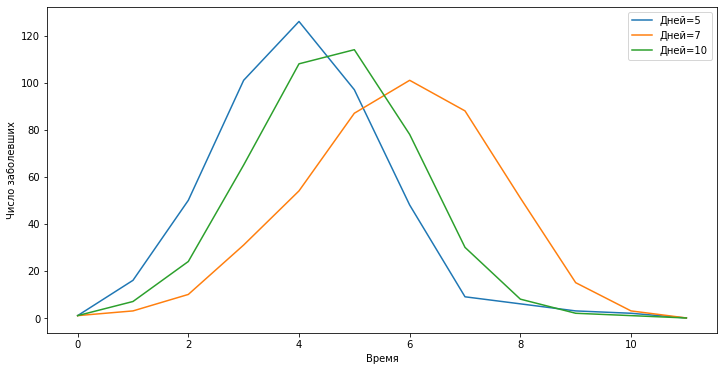

In [ ]:
# число дней
Q = nx.read_edgelist("/content/drive/MyDrive/Граф.txt", nodetype=int, create_using=nx.Graph)
P = max(nx.connected_components(Q), key=len)
G = Q.subgraph(P).copy()
N = G.number_of_nodes()
beta = 0.6 #вероятность заражения
step = 3
# Сначала все неинфецированные
nx.set_node_attributes(G, "S", "sos")
nx.set_node_attributes(G, 0, "tau")
node=G.nodes()
# первое заражение
def locked(G,k):
  print("k = "+ str(k))
  G0=G.copy()
  node=G0.nodes()
  r = random.choice(list(node))
  node[r]["sos"] = "I"
  t = 1
  Y=[1]
  # Пока число больных не превышает трети ничего страшного
  while len([node[i]["sos"] for i in node if  node[i]["sos"]=="I"]) < N/3 and len([node[i]["sos"] for i in node if node[i]["sos"]=="R" or node[i]["sos"]=="S"]) < N:
    r = [i for i in node if node[i]["sos"]=="I"]
    for i in r:
      node[i]["tau"] +=1
      if node[i]["tau"]== step:
        node[i]["sos"] = "R"
    neighbors = []
    neighbors=np.array(neighbors)
    for i in r:
      neighbors = np.append(neighbors,list(G0.neighbors(i)))
    for i in neighbors:
      if node[i]["sos"] == "S":
        p=random.random()
        if p<beta:
          node[i]["sos"] = "I"
    Y.append(len([node[i]["sos"] for i in node if node[i]["sos"]=="I"]))
    t+=1

  print("Шаг на котором все стало плохо = ", t-1, "Преболевших на этот момент = ", len([node[i]["sos"] for i in node if node[i]["sos"]=="R"]))
  print("Больных на этот момент = ", len([node[i]["sos"] for i in node if node[i]["sos"]=="I"]) )
  # Далее уменьшаем число связей на k% процентов случайным образом
  E = G0.number_of_edges()
  edges=G0.edges()
  edges_remove=[]
  r=[]
  r.append(random.choice(list(edges)))
  for i in range(int(E*0.3)):
    while r not in G0.edges():
      r = random.choice(list(edges))
    q=[]
    q.append(r)
    G0.remove_edges_from(q)
    edges_remove.append(r)

  # Далее продолжаем распространение с сокращенными связями 
  t_1=0
  while len([node[i]["sos"] for i in node if node[i]["sos"]=="R" or node[i]["sos"]=="S"]) < N and t_1<k:
    r = [i for i in node if node[i]["sos"]=="I"]
    for i in r:
      node[i]["tau"] +=1
      if node[i]["tau"]== step:
        node[i]["sos"] = "R"
    neighbors = []
    neighbors=np.array(neighbors)
    for i in r:
      neighbors = np.append(neighbors,list(G0.neighbors(i)))
    for i in neighbors:
      if node[i]["sos"] == "S":
        p=random.random()
        if p<beta:
          node[i]["sos"] = "I"
    Y.append(len([node[i]["sos"] for i in node if node[i]["sos"]=="I"]))
    t+=1
    t_1+=1
  print()
  print("Шаг на котором закончился локдаун = ", t-1, "Преболевших на этот момент = ", len([node[i]["sos"] for i in node if node[i]["sos"]=="R"]))
  print("Больных на этот момент = ", len([node[i]["sos"] for i in node if node[i]["sos"]=="I"]) )
  print()
  # Если болезнь не исчезла, а перилд смоизоляции закончился возврящаем удаленные связи
  G0.add_edges_from(edges_remove)
  while len([node[i]["sos"] for i in node if node[i]["sos"]=="R" or node[i]["sos"]=="S"]) < N:
    r = [i for i in node if node[i]["sos"]=="I"]
    for i in r:
      node[i]["tau"] +=1
      if node[i]["tau"]== step:
        node[i]["sos"] = "R"
    neighbors = []
    neighbors=np.array(neighbors)
    for i in r:
      neighbors = np.append(neighbors,list(G0.neighbors(i)))
    for i in neighbors:
      if node[i]["sos"] == "S":
        p=random.random()
        if p<beta:
          node[i]["sos"] = "I"
    Y.append(len([node[i]["sos"] for i in node if node[i]["sos"]=="I"]))
    t+=1
  perebolevshie = len([node[i]["sos"] for i in node if node[i]["sos"]=="R"])
  return Y, perebolevshie, t-1
k=[5,7,10]
fig, ax= plt.subplots()  
fig.set_figwidth(12)
fig.set_figheight(6)  
for i in k:
  U, perebolevshie, t = locked(G,i)
  print()
  print("Всего людей в популяуии = ", N)
  print("Количество переболевших = ", perebolevshie, "   Время до исчезновения болезни = " ,t)
  print("Максимальное число зараженных в момент времени = ", np.max(U)) 
  print()
  X = np.arange(len(U))
  ax.plot(X,U, label="Дней="+ str(i))

ax.set_xlabel("Время")                             
ax.set_ylabel("Число заболевших") 
plt.legend()                        
plt.show()

In [11]:
 # Задание 2.1
G=nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/graph1.txt", nodetype=int, create_using=nx.Graph)
G1=nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/graph2.txt", nodetype=int, create_using=nx.Graph)
N = G.number_of_nodes()

# nx.set_node_attributes(G, "A", "sos")
# nx.set_node_attributes(G, 0, "tau")
def T0(G):
  nx.set_node_attributes(G, "A", "sos")
  node=G.nodes()
  for i in node:
    if i%10 == 4 or i%10 == 5 or i%10 == 6 or i%10 == 7:
      node[i]["sos"]="B"
    if i%10 == 8 or i%10 == 9:
      node[i]["sos"]="C"
  return G, node
def Voice(G):
  G0 = G.copy()
  node0 = G0.nodes() 
  node_sort = sorted(list(node0))
  w=1
  t=0  
  r=[i for i in node_sort if node0[i]["sos"]=="C"]
  while t < 10:
    t+=1
    for i in r:
      A=0
      B=0
      neighbors = list(G0.neighbors(i))
      for j in neighbors:
        if node0[j]["sos"]=="A":
          A+=1
        if node0[j]["sos"]=="B":
          B+=1
      if A > B:
        node0[i]["sos"]="A"
      elif A < B:
         node0[i]["sos"]="B"
      else:
        if w%2 == 1:
          node0[i]["sos"]="A"
        else: 
          node0[i]["sos"]="B"
        w+=1
  A = len([node0[i]["sos"] for i in node0 if node0[i]["sos"]=="A"])
  B = len([node0[i]["sos"] for i in node0 if node0[i]["sos"]=="B"])
  if A > B:
    return "A", abs(A-B)
  elif A < B:
    return "B",abs(A-B)
    # print("Победитель - B")
  else:
    return ("None"), A
G, node=T0(G)
G1, node1=T0(G1)
print("При первой модели связи победитель - ", Voice(G)[0],".", "Отрыв голосов = ", Voice(G)[1] )
print("При второй модели связи победитель - ", Voice(G1)[0],".", "Отрыв голосов = ", Voice(G1)[1])
# print("A = ", Voice(G)[1] )
# print("A1 = ", Voice(G1)[1] )
# print("posle A = ", len([node1[i]["sos"] for i in node1 if node1[i]["sos"]=="A"]))
# print("posle A1 = ", len([node1[i]["sos"] for i in node1 if node1[i]["sos"]=="A"]))

При первой модели связи победитель -  B . Отрыв голосов =  96
При второй модели связи победитель -  B . Отрыв голосов =  256


Y =  [4963, 4977, 4978, 4995, 5002, 5018, 5037, 5048, 5061, 5075]
Y1 =  [4882, 4899, 4914, 4953, 4936, 4972, 5008, 5007, 5045, 5073]


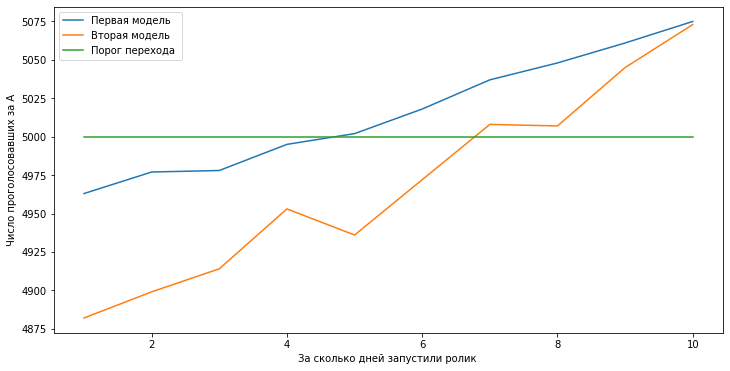

In [ ]:
 # Задание 2.2
def pred_voice(G):
  G0=G.copy()
  node0 = G0.nodes()
  Y=[]
  for t in range(10):
    for i in range(3000+10*t, 3000+10*(t+1)):
      node0[i]["sos"]="A"
    Y.append(Voice(G0)[1])
  return Y
Y = pred_voice(G)
Y1 = pred_voice(G1)  
print("Y = ", Y)  
print("Y1 = ", Y1) 
# print("posle A = ", len([node[i]["sos"] for i in node if node[i]["sos"]=="A"]))
# print("posle A = ", len([node1[i]["sos"] for i in node1 if node1[i]["sos"]=="A"]))  
X = np.arange(1,11)
Y3 = [5000 for i in range(10)]
fig, ax= plt.subplots()  
fig.set_figwidth(12)
fig.set_figheight(6)
ax.plot(X,Y, label='Первая модель ')
ax.plot(X,Y1, label='Вторая модель ')
ax.plot(X,Y3, label='Порог перехода ')
ax.set_xlabel("За сколько дней запустили ролик ")                             
ax.set_ylabel("Число проголосовавших за А")    
plt.legend()                     
plt.show()  